<a href="https://colab.research.google.com/github/RichardMackMarvel00/SPICE-2024/blob/main/waveheight_2017_2023_51000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
!pip install statsmodels
!pip install pmdarima
!pip install seaborn
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn import linear_model

from pandas import to_datetime
import datetime
from datetime import datetime
import pandas as pd
import pandas as pd
from io import StringIO
#import pmdarima as pm
import itertools
import warnings
import matplotlib.pyplot as plt
from matplotlib import pyplot

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict

warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [118]:
df1 = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=51000h2017.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False) # reading in the data

df23 = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=51000h2023.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False) # reading in the data
df22 = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=51000h2022.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False) # reading in the data
df21 = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=51000h2021.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False) # reading in the data
df20 = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=51000h2020.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False) # reading in the data
df19 = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=51000h2019.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False) # reading in the data


!CHECKING HEAD FOR ALL DATA!

In [119]:
df1.head() # looking at first 5 rows

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2016,12,31,23,50,54,6.0,7.5,2.43,10.00,7.08,8,1013.7,21.3,23.7,999.0,99.0,99.00
2,2017,01,01,00,50,41,7.1,8.4,2.47,10.81,7.32,1,1013.3,21.4,23.7,999.0,99.0,99.00
3,2017,01,01,01,50,37,7.0,10.0,2.39,10.00,7.23,7,1013.5,21.3,23.7,999.0,99.0,99.00
4,2017,01,01,02,50,49,6.6,8.8,2.16,10.00,6.82,5,1014.1,21.2,23.7,999.0,99.0,99.00


In [4]:
df23.head() # looking at first 5 rows

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2023,01,01,00,00,123,4.2,6.3,99.00,99.00,99.00,999,1017.1,24.0,24.7,19.4,99.0,99.00
2,2023,01,01,00,10,122,4.1,6.4,2.67,13.79,8.96,297,1017.1,24.0,24.7,19.4,99.0,99.00
3,2023,01,01,00,20,120,4.0,6.3,99.00,99.00,99.00,999,1017.1,23.9,24.7,19.5,99.0,99.00
4,2023,01,01,00,30,110,3.7,5.5,99.00,99.00,99.00,999,1017.1,23.9,24.7,19.8,99.0,99.00


In [5]:
df22.head() # looking at first 5 rows

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2022,01,01,00,00,110,10.5,13.2,99.00,99.00,99.00,999,1012.2,22.5,23.4,18.5,99.0,99.00
2,2022,01,01,00,10,115,10.5,13.7,99.00,99.00,99.00,999,1012.0,22.1,23.4,18.7,99.0,99.00
3,2022,01,01,00,20,118,11.3,14.6,99.00,99.00,99.00,999,1011.9,22.2,23.4,18.6,99.0,99.00
4,2022,01,01,00,30,115,10.8,14.5,99.00,99.00,99.00,999,1011.9,21.9,23.4,18.6,99.0,99.00


In [6]:
df21.head() # looking at first 5 rows

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2021,01,01,00,00,51,7.5,9.5,99.00,99.00,99.00,999,1020.1,22.0,24.7,18.6,99.0,99.00
2,2021,01,01,00,10,52,8.0,9.7,99.00,99.00,99.00,999,1019.9,22.3,24.7,18.8,99.0,99.00
3,2021,01,01,00,20,59,7.8,11.8,99.00,99.00,99.00,999,1019.7,22.5,24.7,18.7,99.0,99.00
4,2021,01,01,00,30,60,9.4,12.4,99.00,99.00,99.00,999,1019.5,22.4,24.7,18.7,99.0,99.00


In [7]:
df20.head() # looking at first 5 rows

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2019,12,31,23,50,86,9.2,11.9,4.55,17.39,9.94,305,1021.1,24.2,24.3,999.0,99.0,99.00
2,2020,01,01,00,50,89,9.9,13.0,4.07,16.00,9.37,303,1020.9,23.4,24.3,999.0,99.0,99.00
3,2020,01,01,01,50,87,8.6,10.9,5.05,19.05,10.87,310,1020.8,24.1,24.3,999.0,99.0,99.00
4,2020,01,01,02,50,82,8.2,10.3,4.45,19.05,10.03,321,1021.1,24.1,24.3,999.0,99.0,99.00


In [113]:
df19.head() # looking at first 5 rows

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2018,12,31,23,50,90,8.4,9.8,2.87,10.00,7.11,81,1017.3,23.4,24.3,999.0,99.0,99.00
2,2019,01,01,00,50,78,7.0,8.5,2.54,10.00,6.80,90,1017.5,23.1,24.3,999.0,99.0,99.00
3,2019,01,01,01,50,92,8.7,10.1,2.61,10.00,6.70,90,1017.7,23.7,24.3,999.0,99.0,99.00
4,2019,01,01,02,50,90,8.4,10.9,2.78,10.00,7.00,61,1018.1,23.8,24.3,999.0,99.0,99.00


In [9]:
!BASIC INFO SECTION!

/bin/bash: line 1: BASIC: command not found


In [10]:
df1.info() # looking at basic information about your variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #YY     8702 non-null   object
 1   MM      8702 non-null   object
 2   DD      8702 non-null   object
 3   hh      8702 non-null   object
 4   mm      8702 non-null   object
 5   WDIR    8702 non-null   object
 6   WSPD    8702 non-null   object
 7   GST     8702 non-null   object
 8   WVHT    8702 non-null   object
 9   DPD     8702 non-null   object
 10  APD     8702 non-null   object
 11  MWD     8702 non-null   object
 12  PRES    8702 non-null   object
 13  ATMP    8702 non-null   object
 14  WTMP    8702 non-null   object
 15  DEWP    8702 non-null   object
 16  VIS     8702 non-null   object
 17  TIDE    8702 non-null   object
dtypes: object(18)
memory usage: 1.2+ MB


In [11]:
df23.info() # looking at basic information about your variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52523 entries, 0 to 52522
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #YY     52523 non-null  object
 1   MM      52523 non-null  object
 2   DD      52523 non-null  object
 3   hh      52523 non-null  object
 4   mm      52523 non-null  object
 5   WDIR    52523 non-null  object
 6   WSPD    52523 non-null  object
 7   GST     52523 non-null  object
 8   WVHT    52523 non-null  object
 9   DPD     52523 non-null  object
 10  APD     52523 non-null  object
 11  MWD     52523 non-null  object
 12  PRES    52523 non-null  object
 13  ATMP    52523 non-null  object
 14  WTMP    52523 non-null  object
 15  DEWP    52523 non-null  object
 16  VIS     52523 non-null  object
 17  TIDE    52523 non-null  object
dtypes: object(18)
memory usage: 7.2+ MB


In [12]:
df22.info() # looking at basic information about your variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52481 entries, 0 to 52480
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #YY     52481 non-null  object
 1   MM      52481 non-null  object
 2   DD      52481 non-null  object
 3   hh      52481 non-null  object
 4   mm      52481 non-null  object
 5   WDIR    52481 non-null  object
 6   WSPD    52481 non-null  object
 7   GST     52481 non-null  object
 8   WVHT    52481 non-null  object
 9   DPD     52481 non-null  object
 10  APD     52481 non-null  object
 11  MWD     52481 non-null  object
 12  PRES    52481 non-null  object
 13  ATMP    52481 non-null  object
 14  WTMP    52481 non-null  object
 15  DEWP    52481 non-null  object
 16  VIS     52481 non-null  object
 17  TIDE    52481 non-null  object
dtypes: object(18)
memory usage: 7.2+ MB


In [13]:
df21.info() # looking at basic information about your variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51523 entries, 0 to 51522
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #YY     51523 non-null  object
 1   MM      51523 non-null  object
 2   DD      51523 non-null  object
 3   hh      51523 non-null  object
 4   mm      51523 non-null  object
 5   WDIR    51523 non-null  object
 6   WSPD    51523 non-null  object
 7   GST     51523 non-null  object
 8   WVHT    51523 non-null  object
 9   DPD     51523 non-null  object
 10  APD     51523 non-null  object
 11  MWD     51523 non-null  object
 12  PRES    51523 non-null  object
 13  ATMP    51523 non-null  object
 14  WTMP    51523 non-null  object
 15  DEWP    51523 non-null  object
 16  VIS     51523 non-null  object
 17  TIDE    51523 non-null  object
dtypes: object(18)
memory usage: 7.1+ MB


In [14]:
df20.info() # looking at basic information about your variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38994 entries, 0 to 38993
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #YY     38994 non-null  object
 1   MM      38994 non-null  object
 2   DD      38994 non-null  object
 3   hh      38994 non-null  object
 4   mm      38994 non-null  object
 5   WDIR    38994 non-null  object
 6   WSPD    38994 non-null  object
 7   GST     38994 non-null  object
 8   WVHT    38994 non-null  object
 9   DPD     38994 non-null  object
 10  APD     38994 non-null  object
 11  MWD     38994 non-null  object
 12  PRES    38994 non-null  object
 13  ATMP    38994 non-null  object
 14  WTMP    38994 non-null  object
 15  DEWP    38994 non-null  object
 16  VIS     38994 non-null  object
 17  TIDE    38994 non-null  object
dtypes: object(18)
memory usage: 5.4+ MB


In [112]:
df19.info() # looking at basic information about your variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #YY     8675 non-null   object
 1   MM      8675 non-null   object
 2   DD      8675 non-null   object
 3   hh      8675 non-null   object
 4   mm      8675 non-null   object
 5   WDIR    8675 non-null   object
 6   WSPD    8675 non-null   object
 7   GST     8675 non-null   object
 8   WVHT    8675 non-null   object
 9   DPD     8675 non-null   object
 10  APD     8675 non-null   object
 11  MWD     8675 non-null   object
 12  PRES    8675 non-null   object
 13  ATMP    8675 non-null   object
 14  WTMP    8675 non-null   object
 15  DEWP    8675 non-null   object
 16  VIS     8675 non-null   object
 17  TIDE    8675 non-null   object
dtypes: object(18)
memory usage: 1.2+ MB


!CLEANING SECTION!

In [16]:
df1_clean = df1.iloc[2:] # dropping the first two rows
df1_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
2,2017,01,01,00,50,41,7.1,8.4,2.47,10.81,7.32,1,1013.3,21.4,23.7,999.0,99.0,99.00
3,2017,01,01,01,50,37,7.0,10.0,2.39,10.00,7.23,7,1013.5,21.3,23.7,999.0,99.0,99.00
4,2017,01,01,02,50,49,6.6,8.8,2.16,10.00,6.82,5,1014.1,21.2,23.7,999.0,99.0,99.00
5,2017,01,01,03,50,45,6.1,7.8,2.39,10.00,7.04,22,1014.6,21.1,23.7,999.0,99.0,99.00
6,2017,01,01,04,50,45,6.4,8.0,2.20,9.09,7.11,7,1015.0,21.3,23.6,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8697,2017,12,31,18,50,75,6.4,8.8,1.38,8.33,5.58,40,1020.2,21.0,23.0,999.0,99.0,99.00
8698,2017,12,31,19,50,63,6.5,8.1,1.50,8.33,5.85,41,1020.5,21.6,23.0,999.0,99.0,99.00
8699,2017,12,31,20,50,71,6.3,8.9,1.50,14.81,5.83,267,1020.4,21.9,23.0,999.0,99.0,99.00
8700,2017,12,31,21,50,60,7.4,9.1,1.43,8.33,5.55,32,1019.8,21.9,23.0,999.0,99.0,99.00


In [17]:
df23_clean = df23.iloc[1:] # dropping the first row
df23_clean


,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
1,2023,01,01,00,00,123,4.2,6.3,99.00,99.00,99.00,999,1017.1,24.0,24.7,19.4,99.0,99.00
2,2023,01,01,00,10,122,4.1,6.4,2.67,13.79,8.96,297,1017.1,24.0,24.7,19.4,99.0,99.00
3,2023,01,01,00,20,120,4.0,6.3,99.00,99.00,99.00,999,1017.1,23.9,24.7,19.5,99.0,99.00
4,2023,01,01,00,30,110,3.7,5.5,99.00,99.00,99.00,999,1017.1,23.9,24.7,19.8,99.0,99.00
5,2023,01,01,00,40,104,3.8,5.8,2.49,13.79,8.80,285,1017.0,23.9,24.7,19.9,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52518,2023,12,31,23,10,177,4.8,6.2,2.56,17.39,9.28,329,1019.1,22.2,24.0,18.5,99.0,99.0
52519,2023,12,31,23,20,174,4.6,6.1,99.0,99.0,99.0,999,1018.9,22.6,24.0,17.9,99.0,99.0
52520,2023,12,31,23,30,168,5.3,6.9,99.0,99.0,99.0,999,1018.8,22.7,24.0,18.1,99.0,99.0
52521,2023,12,31,23,40,168,4.6,6.5,2.87,17.39,10.02,324,1018.8,22.8,24.0,17.7,99.0,99.0


In [18]:
df22_clean = df22.iloc[1:] # dropping the first row
df22_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
1,2022,01,01,00,00,110,10.5,13.2,99.00,99.00,99.00,999,1012.2,22.5,23.4,18.5,99.0,99.00
2,2022,01,01,00,10,115,10.5,13.7,99.00,99.00,99.00,999,1012.0,22.1,23.4,18.7,99.0,99.00
3,2022,01,01,00,20,118,11.3,14.6,99.00,99.00,99.00,999,1011.9,22.2,23.4,18.6,99.0,99.00
4,2022,01,01,00,30,115,10.8,14.5,99.00,99.00,99.00,999,1011.9,21.9,23.4,18.6,99.0,99.00
5,2022,01,01,00,40,116,10.1,13.3,2.94,8.33,6.33,73,1011.9,22.2,23.4,18.8,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52476,2022,12,31,23,10,130,4.1,5.9,2.38,12.9,8.21,301,1017.7,24.1,24.6,18.8,99.0,99.0
52477,2022,12,31,23,20,127,4.5,6.7,99.0,99.0,99.0,999,1017.5,24.1,24.6,18.9,99.0,99.0
52478,2022,12,31,23,30,133,4.9,7.8,99.0,99.0,99.0,999,1017.4,24.1,24.6,18.5,99.0,99.0
52479,2022,12,31,23,40,117,4.1,6.8,2.48,12.9,8.43,295,1017.3,24.2,24.7,19.1,99.0,99.0


In [19]:
df21_clean = df21.iloc[1:] # dropping the first row
df21_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
1,2021,01,01,00,00,51,7.5,9.5,99.00,99.00,99.00,999,1020.1,22.0,24.7,18.6,99.0,99.00
2,2021,01,01,00,10,52,8.0,9.7,99.00,99.00,99.00,999,1019.9,22.3,24.7,18.8,99.0,99.00
3,2021,01,01,00,20,59,7.8,11.8,99.00,99.00,99.00,999,1019.7,22.5,24.7,18.7,99.0,99.00
4,2021,01,01,00,30,60,9.4,12.4,99.00,99.00,99.00,999,1019.5,22.4,24.7,18.7,99.0,99.00
5,2021,01,01,00,40,67,6.7,9.6,3.06,17.39,8.29,328,1019.4,21.8,24.7,18.7,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,2021,12,31,23,10,107,10.3,12.6,99.0,99.0,99.0,999,1012.6,22.7,23.4,17.8,99.0,99.0
51519,2021,12,31,23,20,105,10.5,12.7,99.0,99.0,99.0,999,1012.5,22.7,23.4,17.9,99.0,99.0
51520,2021,12,31,23,30,106,10.7,12.9,99.0,99.0,99.0,999,1012.3,22.8,23.4,18.1,99.0,99.0
51521,2021,12,31,23,40,106,10.9,13.9,2.93,9.09,6.53,51,1012.2,22.7,23.4,18.1,99.0,99.0


In [20]:
df20_clean = df20.iloc[2:] # dropping the first two rows
df20_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
2,2020,01,01,00,50,89,9.9,13.0,4.07,16.00,9.37,303,1020.9,23.4,24.3,999.0,99.0,99.00
3,2020,01,01,01,50,87,8.6,10.9,5.05,19.05,10.87,310,1020.8,24.1,24.3,999.0,99.0,99.00
4,2020,01,01,02,50,82,8.2,10.3,4.45,19.05,10.03,321,1021.1,24.1,24.3,999.0,99.0,99.00
5,2020,01,01,03,50,80,7.2,9.6,4.60,19.05,10.26,314,1021.5,23.6,24.3,999.0,99.0,99.00
6,2020,01,01,04,50,83,8.7,11.6,4.14,17.39,9.69,312,1021.4,23.6,24.3,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38989,2020,12,31,23,10,52,8.2,10.6,99.0,99.0,99.0,999,1020.9,23.1,24.7,18.2,99.0,99.0
38990,2020,12,31,23,20,51,8.4,10.2,99.0,99.0,99.0,999,1020.7,23.2,24.7,18.3,99.0,99.0
38991,2020,12,31,23,30,60,8.6,11.2,99.0,99.0,99.0,999,1020.5,23.1,24.7,18.8,99.0,99.0
38992,2020,12,31,23,40,60,9.8,12.0,3.03,14.81,8.01,319,1020.5,22.7,24.7,18.5,99.0,99.0


In [111]:
df19_clean = df19.iloc[2:] # dropping the first two rows
df19_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
2,2019,01,01,00,50,78,7.0,8.5,2.54,10.00,6.80,90,1017.5,23.1,24.3,999.0,99.0,99.00
3,2019,01,01,01,50,92,8.7,10.1,2.61,10.00,6.70,90,1017.7,23.7,24.3,999.0,99.0,99.00
4,2019,01,01,02,50,90,8.4,10.9,2.78,10.00,7.00,61,1018.1,23.8,24.3,999.0,99.0,99.00
5,2019,01,01,03,50,91,9.0,10.9,2.58,10.81,6.60,84,1018.6,23.7,24.3,999.0,99.0,99.00
6,2019,01,01,04,50,87,8.7,10.5,2.65,9.09,6.66,74,1019.1,23.6,24.3,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,2019,12,31,18,50,78,10.7,13.6,4.40,17.39,9.71,314,1024.2,24.1,24.3,999.0,99.0,99.00
8671,2019,12,31,19,50,82,9.1,12.4,5.43,19.05,10.71,312,1024.9,24.1,24.3,999.0,99.0,99.00
8672,2019,12,31,20,50,77,9.3,12.3,4.54,19.05,9.65,309,1024.5,24.0,24.3,999.0,99.0,99.00
8673,2019,12,31,21,50,76,8.6,11.0,4.66,19.05,10.19,305,1023.5,23.9,24.3,999.0,99.0,99.00


!STRING CLEANING!

In [22]:
df1_clean = df1_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df1_clean['Date'] = df1_clean['#YY'] + '-' + df1_clean['MM'] + '-' + df1_clean['DD'] + ' ' + df1_clean['hh'] + ':' + df1_clean['mm'] # combining all the datetime info into a Date column
df1_clean = df1_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df1_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
2,41,7.1,8.4,2.47,10.81,7.32,1,1013.3,21.4,23.7,999.0,99.0,99.00,2017-01-01 00:50
3,37,7.0,10.0,2.39,10.00,7.23,7,1013.5,21.3,23.7,999.0,99.0,99.00,2017-01-01 01:50
4,49,6.6,8.8,2.16,10.00,6.82,5,1014.1,21.2,23.7,999.0,99.0,99.00,2017-01-01 02:50
5,45,6.1,7.8,2.39,10.00,7.04,22,1014.6,21.1,23.7,999.0,99.0,99.00,2017-01-01 03:50
6,45,6.4,8.0,2.20,9.09,7.11,7,1015.0,21.3,23.6,999.0,99.0,99.00,2017-01-01 04:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8697,75,6.4,8.8,1.38,8.33,5.58,40,1020.2,21.0,23.0,999.0,99.0,99.00,2017-12-31 18:50
8698,63,6.5,8.1,1.50,8.33,5.85,41,1020.5,21.6,23.0,999.0,99.0,99.00,2017-12-31 19:50
8699,71,6.3,8.9,1.50,14.81,5.83,267,1020.4,21.9,23.0,999.0,99.0,99.00,2017-12-31 20:50
8700,60,7.4,9.1,1.43,8.33,5.55,32,1019.8,21.9,23.0,999.0,99.0,99.00,2017-12-31 21:50


In [23]:
df23_clean = df23_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df23_clean['Date'] = df23_clean['#YY'] + '-' + df23_clean['MM'] + '-' + df23_clean['DD'] + ' ' + df23_clean['hh'] + ':' + df23_clean['mm'] # combining all the datetime info into a Date column
df23_clean = df23_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time column
df23_clean


,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,123,4.2,6.3,99.00,99.00,99.00,999,1017.1,24.0,24.7,19.4,99.0,99.00,2023-01-01 00:00
2,122,4.1,6.4,2.67,13.79,8.96,297,1017.1,24.0,24.7,19.4,99.0,99.00,2023-01-01 00:10
3,120,4.0,6.3,99.00,99.00,99.00,999,1017.1,23.9,24.7,19.5,99.0,99.00,2023-01-01 00:20
4,110,3.7,5.5,99.00,99.00,99.00,999,1017.1,23.9,24.7,19.8,99.0,99.00,2023-01-01 00:30
5,104,3.8,5.8,2.49,13.79,8.80,285,1017.0,23.9,24.7,19.9,99.0,99.00,2023-01-01 00:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52518,177,4.8,6.2,2.56,17.39,9.28,329,1019.1,22.2,24.0,18.5,99.0,99.0,2023-12-31 23:10
52519,174,4.6,6.1,99.0,99.0,99.0,999,1018.9,22.6,24.0,17.9,99.0,99.0,2023-12-31 23:20
52520,168,5.3,6.9,99.0,99.0,99.0,999,1018.8,22.7,24.0,18.1,99.0,99.0,2023-12-31 23:30
52521,168,4.6,6.5,2.87,17.39,10.02,324,1018.8,22.8,24.0,17.7,99.0,99.0,2023-12-31 23:40


In [24]:
df22_clean = df22_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df22_clean['Date'] = df22_clean['#YY'] + '-' + df22_clean['MM'] + '-' + df22_clean['DD'] + ' ' + df22_clean['hh'] + ':' + df22_clean['mm'] # combining all the datetime info into a Date column
df22_clean = df22_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df22_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,110,10.5,13.2,99.00,99.00,99.00,999,1012.2,22.5,23.4,18.5,99.0,99.00,2022-01-01 00:00
2,115,10.5,13.7,99.00,99.00,99.00,999,1012.0,22.1,23.4,18.7,99.0,99.00,2022-01-01 00:10
3,118,11.3,14.6,99.00,99.00,99.00,999,1011.9,22.2,23.4,18.6,99.0,99.00,2022-01-01 00:20
4,115,10.8,14.5,99.00,99.00,99.00,999,1011.9,21.9,23.4,18.6,99.0,99.00,2022-01-01 00:30
5,116,10.1,13.3,2.94,8.33,6.33,73,1011.9,22.2,23.4,18.8,99.0,99.00,2022-01-01 00:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52476,130,4.1,5.9,2.38,12.9,8.21,301,1017.7,24.1,24.6,18.8,99.0,99.0,2022-12-31 23:10
52477,127,4.5,6.7,99.0,99.0,99.0,999,1017.5,24.1,24.6,18.9,99.0,99.0,2022-12-31 23:20
52478,133,4.9,7.8,99.0,99.0,99.0,999,1017.4,24.1,24.6,18.5,99.0,99.0,2022-12-31 23:30
52479,117,4.1,6.8,2.48,12.9,8.43,295,1017.3,24.2,24.7,19.1,99.0,99.0,2022-12-31 23:40


In [49]:
df21_clean = df21_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df21_clean['Date'] = df21_clean['#YY'] + '-' + df21_clean['MM'] + '-' + df21_clean['DD'] + ' ' + df21_clean['hh'] + ':' + df21_clean['mm'] # combining all the datetime info into a Date column
df21_clean = df21_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df21_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,51,7.5,9.5,99.00,99.00,99.00,999,1020.1,22.0,24.7,18.6,99.0,99.00,2021-01-01 00:00
2,52,8.0,9.7,99.00,99.00,99.00,999,1019.9,22.3,24.7,18.8,99.0,99.00,2021-01-01 00:10
3,59,7.8,11.8,99.00,99.00,99.00,999,1019.7,22.5,24.7,18.7,99.0,99.00,2021-01-01 00:20
4,60,9.4,12.4,99.00,99.00,99.00,999,1019.5,22.4,24.7,18.7,99.0,99.00,2021-01-01 00:30
5,67,6.7,9.6,3.06,17.39,8.29,328,1019.4,21.8,24.7,18.7,99.0,99.00,2021-01-01 00:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,107,10.3,12.6,99.0,99.0,99.0,999,1012.6,22.7,23.4,17.8,99.0,99.0,2021-12-31 23:10
51519,105,10.5,12.7,99.0,99.0,99.0,999,1012.5,22.7,23.4,17.9,99.0,99.0,2021-12-31 23:20
51520,106,10.7,12.9,99.0,99.0,99.0,999,1012.3,22.8,23.4,18.1,99.0,99.0,2021-12-31 23:30
51521,106,10.9,13.9,2.93,9.09,6.53,51,1012.2,22.7,23.4,18.1,99.0,99.0,2021-12-31 23:40


In [25]:
df20_clean = df20_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df20_clean['Date'] = df20_clean['#YY'] + '-' + df20_clean['MM'] + '-' + df20_clean['DD'] + ' ' + df20_clean['hh'] + ':' + df20_clean['mm'] # combining all the datetime info into a Date column
df20_clean = df20_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df20_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
2,89,9.9,13.0,4.07,16.00,9.37,303,1020.9,23.4,24.3,999.0,99.0,99.00,2020-01-01 00:50
3,87,8.6,10.9,5.05,19.05,10.87,310,1020.8,24.1,24.3,999.0,99.0,99.00,2020-01-01 01:50
4,82,8.2,10.3,4.45,19.05,10.03,321,1021.1,24.1,24.3,999.0,99.0,99.00,2020-01-01 02:50
5,80,7.2,9.6,4.60,19.05,10.26,314,1021.5,23.6,24.3,999.0,99.0,99.00,2020-01-01 03:50
6,83,8.7,11.6,4.14,17.39,9.69,312,1021.4,23.6,24.3,999.0,99.0,99.00,2020-01-01 04:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38989,52,8.2,10.6,99.0,99.0,99.0,999,1020.9,23.1,24.7,18.2,99.0,99.0,2020-12-31 23:10
38990,51,8.4,10.2,99.0,99.0,99.0,999,1020.7,23.2,24.7,18.3,99.0,99.0,2020-12-31 23:20
38991,60,8.6,11.2,99.0,99.0,99.0,999,1020.5,23.1,24.7,18.8,99.0,99.0,2020-12-31 23:30
38992,60,9.8,12.0,3.03,14.81,8.01,319,1020.5,22.7,24.7,18.5,99.0,99.0,2020-12-31 23:40


In [114]:
df19_clean = df19_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df19_clean['Date'] = df19_clean['#YY'] + '-' + df19_clean['MM'] + '-' + df19_clean['DD'] + ' ' + df19_clean['hh'] + ':' + df19_clean['mm'] # combining all the datetime info into a Date column
df19_clean = df19_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df19_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
2,78,7.0,8.5,2.54,10.00,6.80,90,1017.5,23.1,24.3,999.0,99.0,99.00,2019-01-01 00:50
3,92,8.7,10.1,2.61,10.00,6.70,90,1017.7,23.7,24.3,999.0,99.0,99.00,2019-01-01 01:50
4,90,8.4,10.9,2.78,10.00,7.00,61,1018.1,23.8,24.3,999.0,99.0,99.00,2019-01-01 02:50
5,91,9.0,10.9,2.58,10.81,6.60,84,1018.6,23.7,24.3,999.0,99.0,99.00,2019-01-01 03:50
6,87,8.7,10.5,2.65,9.09,6.66,74,1019.1,23.6,24.3,999.0,99.0,99.00,2019-01-01 04:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,78,10.7,13.6,4.40,17.39,9.71,314,1024.2,24.1,24.3,999.0,99.0,99.00,2019-12-31 18:50
8671,82,9.1,12.4,5.43,19.05,10.71,312,1024.9,24.1,24.3,999.0,99.0,99.00,2019-12-31 19:50
8672,77,9.3,12.3,4.54,19.05,9.65,309,1024.5,24.0,24.3,999.0,99.0,99.00,2019-12-31 20:50
8673,76,8.6,11.0,4.66,19.05,10.19,305,1023.5,23.9,24.3,999.0,99.0,99.00,2019-12-31 21:50


!CLEAN DATE!

In [27]:
df1_clean['Date'] = pd.to_datetime(df1_clean['Date'])
df1_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
2,41,7.1,8.4,2.47,10.81,7.32,1,1013.3,21.4,23.7,999.0,99.0,99.00,2017-01-01 00:50:00
3,37,7.0,10.0,2.39,10.00,7.23,7,1013.5,21.3,23.7,999.0,99.0,99.00,2017-01-01 01:50:00
4,49,6.6,8.8,2.16,10.00,6.82,5,1014.1,21.2,23.7,999.0,99.0,99.00,2017-01-01 02:50:00
5,45,6.1,7.8,2.39,10.00,7.04,22,1014.6,21.1,23.7,999.0,99.0,99.00,2017-01-01 03:50:00
6,45,6.4,8.0,2.20,9.09,7.11,7,1015.0,21.3,23.6,999.0,99.0,99.00,2017-01-01 04:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8697,75,6.4,8.8,1.38,8.33,5.58,40,1020.2,21.0,23.0,999.0,99.0,99.00,2017-12-31 18:50:00
8698,63,6.5,8.1,1.50,8.33,5.85,41,1020.5,21.6,23.0,999.0,99.0,99.00,2017-12-31 19:50:00
8699,71,6.3,8.9,1.50,14.81,5.83,267,1020.4,21.9,23.0,999.0,99.0,99.00,2017-12-31 20:50:00
8700,60,7.4,9.1,1.43,8.33,5.55,32,1019.8,21.9,23.0,999.0,99.0,99.00,2017-12-31 21:50:00


In [28]:
df23_clean['Date'] = pd.to_datetime(df23_clean['Date'])
df23_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,123,4.2,6.3,99.00,99.00,99.00,999,1017.1,24.0,24.7,19.4,99.0,99.00,2023-01-01 00:00:00
2,122,4.1,6.4,2.67,13.79,8.96,297,1017.1,24.0,24.7,19.4,99.0,99.00,2023-01-01 00:10:00
3,120,4.0,6.3,99.00,99.00,99.00,999,1017.1,23.9,24.7,19.5,99.0,99.00,2023-01-01 00:20:00
4,110,3.7,5.5,99.00,99.00,99.00,999,1017.1,23.9,24.7,19.8,99.0,99.00,2023-01-01 00:30:00
5,104,3.8,5.8,2.49,13.79,8.80,285,1017.0,23.9,24.7,19.9,99.0,99.00,2023-01-01 00:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52518,177,4.8,6.2,2.56,17.39,9.28,329,1019.1,22.2,24.0,18.5,99.0,99.0,2023-12-31 23:10:00
52519,174,4.6,6.1,99.0,99.0,99.0,999,1018.9,22.6,24.0,17.9,99.0,99.0,2023-12-31 23:20:00
52520,168,5.3,6.9,99.0,99.0,99.0,999,1018.8,22.7,24.0,18.1,99.0,99.0,2023-12-31 23:30:00
52521,168,4.6,6.5,2.87,17.39,10.02,324,1018.8,22.8,24.0,17.7,99.0,99.0,2023-12-31 23:40:00


In [29]:
df22_clean['Date'] = pd.to_datetime(df22_clean['Date'])
df22_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,110,10.5,13.2,99.00,99.00,99.00,999,1012.2,22.5,23.4,18.5,99.0,99.00,2022-01-01 00:00:00
2,115,10.5,13.7,99.00,99.00,99.00,999,1012.0,22.1,23.4,18.7,99.0,99.00,2022-01-01 00:10:00
3,118,11.3,14.6,99.00,99.00,99.00,999,1011.9,22.2,23.4,18.6,99.0,99.00,2022-01-01 00:20:00
4,115,10.8,14.5,99.00,99.00,99.00,999,1011.9,21.9,23.4,18.6,99.0,99.00,2022-01-01 00:30:00
5,116,10.1,13.3,2.94,8.33,6.33,73,1011.9,22.2,23.4,18.8,99.0,99.00,2022-01-01 00:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52476,130,4.1,5.9,2.38,12.9,8.21,301,1017.7,24.1,24.6,18.8,99.0,99.0,2022-12-31 23:10:00
52477,127,4.5,6.7,99.0,99.0,99.0,999,1017.5,24.1,24.6,18.9,99.0,99.0,2022-12-31 23:20:00
52478,133,4.9,7.8,99.0,99.0,99.0,999,1017.4,24.1,24.6,18.5,99.0,99.0,2022-12-31 23:30:00
52479,117,4.1,6.8,2.48,12.9,8.43,295,1017.3,24.2,24.7,19.1,99.0,99.0,2022-12-31 23:40:00


In [50]:
df21_clean['Date'] = pd.to_datetime(df21_clean['Date'])
df21_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,51,7.5,9.5,99.00,99.00,99.00,999,1020.1,22.0,24.7,18.6,99.0,99.00,2021-01-01 00:00:00
2,52,8.0,9.7,99.00,99.00,99.00,999,1019.9,22.3,24.7,18.8,99.0,99.00,2021-01-01 00:10:00
3,59,7.8,11.8,99.00,99.00,99.00,999,1019.7,22.5,24.7,18.7,99.0,99.00,2021-01-01 00:20:00
4,60,9.4,12.4,99.00,99.00,99.00,999,1019.5,22.4,24.7,18.7,99.0,99.00,2021-01-01 00:30:00
5,67,6.7,9.6,3.06,17.39,8.29,328,1019.4,21.8,24.7,18.7,99.0,99.00,2021-01-01 00:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,107,10.3,12.6,99.0,99.0,99.0,999,1012.6,22.7,23.4,17.8,99.0,99.0,2021-12-31 23:10:00
51519,105,10.5,12.7,99.0,99.0,99.0,999,1012.5,22.7,23.4,17.9,99.0,99.0,2021-12-31 23:20:00
51520,106,10.7,12.9,99.0,99.0,99.0,999,1012.3,22.8,23.4,18.1,99.0,99.0,2021-12-31 23:30:00
51521,106,10.9,13.9,2.93,9.09,6.53,51,1012.2,22.7,23.4,18.1,99.0,99.0,2021-12-31 23:40:00


In [31]:
df20_clean['Date'] = pd.to_datetime(df20_clean['Date'])
df20_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
2,89,9.9,13.0,4.07,16.00,9.37,303,1020.9,23.4,24.3,999.0,99.0,99.00,2020-01-01 00:50:00
3,87,8.6,10.9,5.05,19.05,10.87,310,1020.8,24.1,24.3,999.0,99.0,99.00,2020-01-01 01:50:00
4,82,8.2,10.3,4.45,19.05,10.03,321,1021.1,24.1,24.3,999.0,99.0,99.00,2020-01-01 02:50:00
5,80,7.2,9.6,4.60,19.05,10.26,314,1021.5,23.6,24.3,999.0,99.0,99.00,2020-01-01 03:50:00
6,83,8.7,11.6,4.14,17.39,9.69,312,1021.4,23.6,24.3,999.0,99.0,99.00,2020-01-01 04:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38989,52,8.2,10.6,99.0,99.0,99.0,999,1020.9,23.1,24.7,18.2,99.0,99.0,2020-12-31 23:10:00
38990,51,8.4,10.2,99.0,99.0,99.0,999,1020.7,23.2,24.7,18.3,99.0,99.0,2020-12-31 23:20:00
38991,60,8.6,11.2,99.0,99.0,99.0,999,1020.5,23.1,24.7,18.8,99.0,99.0,2020-12-31 23:30:00
38992,60,9.8,12.0,3.03,14.81,8.01,319,1020.5,22.7,24.7,18.5,99.0,99.0,2020-12-31 23:40:00


In [109]:
df19_clean['Date'] = pd.to_datetime(df19_clean['Date'])
df19_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
2,78,7.0,8.5,2.54,10.00,6.80,90,1017.5,23.1,24.3,999.0,99.0,99.00,2019-01-01 00:50:00
3,92,8.7,10.1,2.61,10.00,6.70,90,1017.7,23.7,24.3,999.0,99.0,99.00,2019-01-01 01:50:00
4,90,8.4,10.9,2.78,10.00,7.00,61,1018.1,23.8,24.3,999.0,99.0,99.00,2019-01-01 02:50:00
5,91,9.0,10.9,2.58,10.81,6.60,84,1018.6,23.7,24.3,999.0,99.0,99.00,2019-01-01 03:50:00
6,87,8.7,10.5,2.65,9.09,6.66,74,1019.1,23.6,24.3,999.0,99.0,99.00,2019-01-01 04:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,78,10.7,13.6,4.40,17.39,9.71,314,1024.2,24.1,24.3,999.0,99.0,99.00,2019-12-31 18:50:00
8671,82,9.1,12.4,5.43,19.05,10.71,312,1024.9,24.1,24.3,999.0,99.0,99.00,2019-12-31 19:50:00
8672,77,9.3,12.3,4.54,19.05,9.65,309,1024.5,24.0,24.3,999.0,99.0,99.00,2019-12-31 20:50:00
8673,76,8.6,11.0,4.66,19.05,10.19,305,1023.5,23.9,24.3,999.0,99.0,99.00,2019-12-31 21:50:00


!LENGTH OF ALL DATA SETS!


In [36]:
print(len(df23))
print(len(df22))
print(len(df21))
print(len(df20))
print(len(df19))

52523
52481
51523
38994
8675


!CUT DATA IN HALF!

In [ ]:
#df1_clean = df1_clean[df1_clean['Date'].astype(str).str.endswith('26')]
#df1_clean

In [34]:
df23_clean.info() # looking at updated info about our clean dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52522 entries, 1 to 52522
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   WDIR    52522 non-null  object        
 1   WSPD    52522 non-null  object        
 2   GST     52522 non-null  object        
 3   WVHT    52522 non-null  object        
 4   DPD     52522 non-null  object        
 5   APD     52522 non-null  object        
 6   MWD     52522 non-null  object        
 7   PRES    52522 non-null  object        
 8   ATMP    52522 non-null  object        
 9   WTMP    52522 non-null  object        
 10  DEWP    52522 non-null  object        
 11  VIS     52522 non-null  object        
 12  TIDE    52522 non-null  object        
 13  Date    52522 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(13)
memory usage: 5.6+ MB


!CHECKING TO ENSURE ALL NA VALUES ARE 0!

In [37]:
na_values = pd.DataFrame(df19.isna().sum())
na_values

,0
#YY,0
MM,0
DD,0
hh,0
mm,0
WDIR,0
WSPD,0
GST,0
WVHT,0
DPD,0


!REMOVE 99.00!

In [80]:
df19_clean.loc[df19_clean['WVHT'] == '99.00'] #finding all 99.00 values in WVHT

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date


In [81]:
df23_clean = df23_clean.drop(df23_clean[df23_clean['WVHT'] == '99.00'].index)#removing any 99.00 values in WVHT

In [82]:
df22_clean = df22_clean.drop(df22_clean[df22_clean['WVHT'] == '99.00'].index)#removing any 99.00 values in WVHT

In [83]:
df21_clean = df21_clean.drop(df21_clean[df21_clean['WVHT'] == '99.00'].index)#removing any 99.00 values in WVHT

In [84]:
df20_clean = df20_clean.drop(df20_clean[df20_clean['WVHT'] == '99.00'].index)#removing any 99.00 values in WVHT

In [104]:
df19_clean = df19_clean.drop(df19_clean[df19_clean['WVHT'] == '99.00'].index)#removing any 99.00 values in WVHT
df19.tail()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
8670,2019,12,31,18,50,78,10.7,13.6,4.40,17.39,9.71,314,1024.2,24.1,24.3,999.0,99.0,99.00
8671,2019,12,31,19,50,82,9.1,12.4,5.43,19.05,10.71,312,1024.9,24.1,24.3,999.0,99.0,99.00
8672,2019,12,31,20,50,77,9.3,12.3,4.54,19.05,9.65,309,1024.5,24.0,24.3,999.0,99.0,99.00
8673,2019,12,31,21,50,76,8.6,11.0,4.66,19.05,10.19,305,1023.5,23.9,24.3,999.0,99.0,99.00
8674,2019,12,31,22,50,82,9.4,11.8,5.25,19.05,10.85,307,1021.9,24.0,24.3,999.0,99.0,99.00


In [86]:
arima_data = df1_clean[['Date', 'WVHT']] # selecting columns
arima_data.head() # looking at first five rows of arima_data

,Date,WVHT
2,2017-01-01 00:50:00,2.47
3,2017-01-01 01:50:00,2.39
4,2017-01-01 02:50:00,2.16
5,2017-01-01 03:50:00,2.39
6,2017-01-01 04:50:00,2.20


In [87]:
arima_data23 = df23_clean[['Date', 'WVHT']] # selecting columns
arima_data23.head() # looking at first five rows of arima_data

,Date,WVHT
2,2023-01-01 00:10:00,2.67
5,2023-01-01 00:40:00,2.49
8,2023-01-01 01:10:00,2.47
11,2023-01-01 01:40:00,2.61
14,2023-01-01 02:10:00,2.39


In [89]:
arima_data22 = df22_clean[['Date', 'WVHT']] # selecting columns
arima_data22.head() # looking at first five rows of arima_data

,Date,WVHT
5,2022-01-01 00:40:00,2.94
11,2022-01-01 01:40:00,3.02
17,2022-01-01 02:40:00,3.03
23,2022-01-01 03:40:00,3.12
29,2022-01-01 04:40:00,3.20


In [90]:
arima_data21 = df21_clean[['Date', 'WVHT']] # selecting columns
arima_data21.head() # looking at first five rows of arima_data

,Date,WVHT
5,2021-01-01 00:40:00,3.06
11,2021-01-01 01:40:00,2.92
17,2021-01-01 02:40:00,3.07
23,2021-01-01 03:40:00,3.30
29,2021-01-01 04:40:00,3.38


In [91]:
arima_data20 = df20_clean[['Date', 'WVHT']] # selecting columns
arima_data20.head() # looking at first five rows of arima_data

,Date,WVHT
2,2020-01-01 00:50:00,4.07
3,2020-01-01 01:50:00,5.05
4,2020-01-01 02:50:00,4.45
5,2020-01-01 03:50:00,4.60
6,2020-01-01 04:50:00,4.14


In [108]:
arima_data19 = df19_clean[['Date', 'WVHT']] # selecting columns
arima_data19.head() # looking at first five rows of arima_data

,Date,WVHT
2,2019-01-01 00:50:00,2.54
3,2019-01-01 01:50:00,2.61
4,2019-01-01 02:50:00,2.78
5,2019-01-01 03:50:00,2.58
6,2019-01-01 04:50:00,2.65


!SETTING THE INDEX!

In [93]:
arima_data = arima_data.set_index('Date') # setting date column to index
arima_data.head() # looking at first five rows of arima_data

,WVHT
Date,
2017-01-01 00:50:00,2.47
2017-01-01 01:50:00,2.39
2017-01-01 02:50:00,2.16
2017-01-01 03:50:00,2.39
2017-01-01 04:50:00,2.20


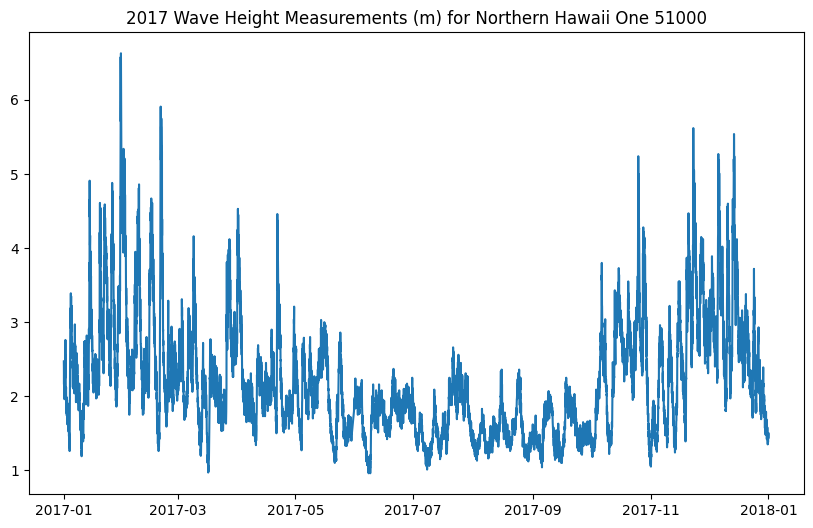

In [94]:
arima_data['WVHT'] = arima_data['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(10,6)) # setting up the dimentions for our plot
plt.title('2017 Wave Height Measurements (m) for Northern Hawaii One 51000') # setting up a title
plt.plot(arima_data['WVHT']) # plotting our data

In [95]:
arima_data23 = arima_data23.set_index('Date') # setting date column to index
arima_data23.head() # looking at first five rows of arima_data

,WVHT
Date,
2023-01-01 00:10:00,2.67
2023-01-01 00:40:00,2.49
2023-01-01 01:10:00,2.47
2023-01-01 01:40:00,2.61
2023-01-01 02:10:00,2.39


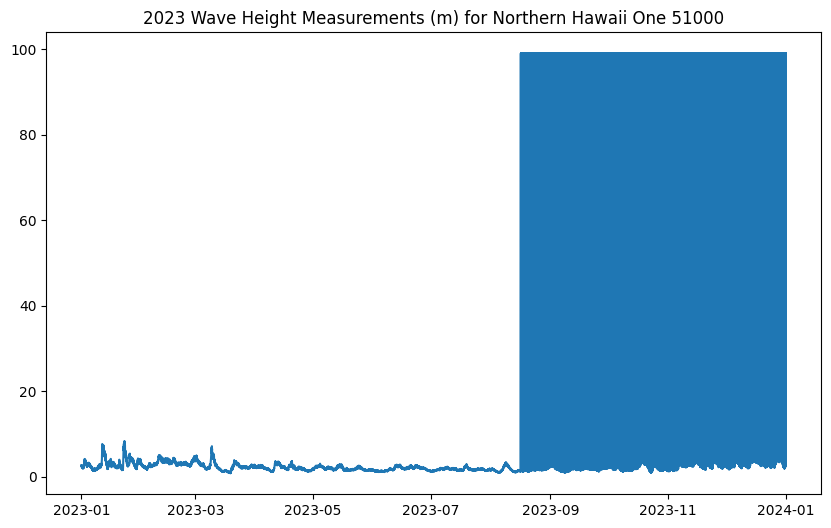

In [96]:
arima_data23['WVHT'] = arima_data23['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(10,6)) # setting up the dimentions for our plot
plt.title('2023 Wave Height Measurements (m) for Northern Hawaii One 51000') # setting up a title
plt.plot(arima_data23['WVHT']) # plotting our data

In [97]:
arima_data22 = arima_data22.set_index('Date') # setting date column to index
arima_data22.head() # looking at first five rows of arima_data

,WVHT
Date,
2022-01-01 00:40:00,2.94
2022-01-01 01:40:00,3.02
2022-01-01 02:40:00,3.03
2022-01-01 03:40:00,3.12
2022-01-01 04:40:00,3.20


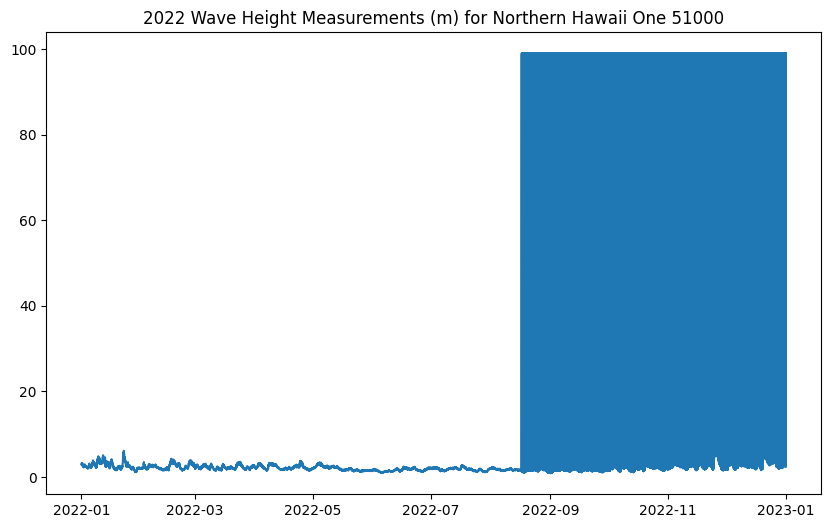

In [98]:
arima_data22['WVHT'] = arima_data22['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(10,6)) # setting up the dimentions for our plot
plt.title('2022 Wave Height Measurements (m) for Northern Hawaii One 51000') # setting up a title
plt.plot(arima_data22['WVHT']) # plotting our data

In [102]:
arima_data21 = arima_data21.set_index('Date') # setting date column to index
arima_data21.head() # looking at first five rows of arima_data

,WVHT
Date,
2021-01-01 00:40:00,3.06
2021-01-01 01:40:00,2.92
2021-01-01 02:40:00,3.07
2021-01-01 03:40:00,3.30
2021-01-01 04:40:00,3.38


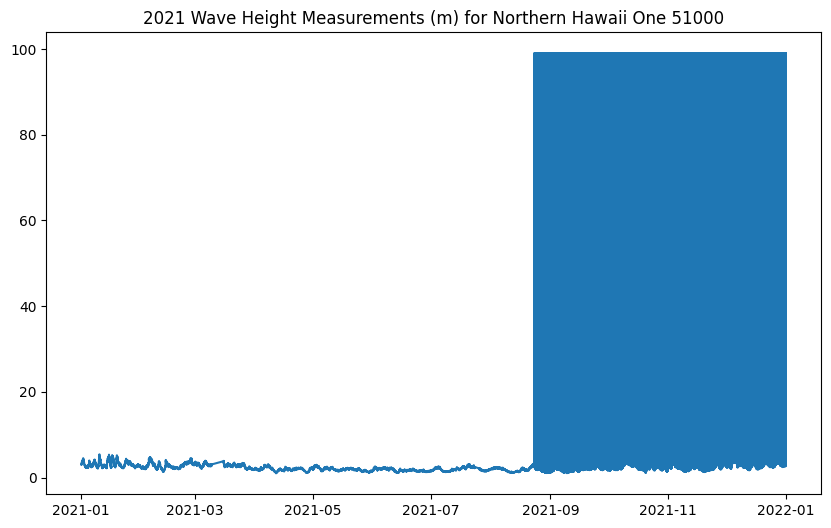

In [103]:
arima_data21['WVHT'] = arima_data21['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(10,6)) # setting up the dimentions for our plot
plt.title('2021 Wave Height Measurements (m) for Northern Hawaii One 51000') # setting up a title
plt.plot(arima_data21['WVHT']) # plotting our data

In [105]:
arima_data20 = arima_data20.set_index('Date') # setting date column to index
arima_data20.head() # looking at first five rows of arima_data

,WVHT
Date,
2020-01-01 00:50:00,4.07
2020-01-01 01:50:00,5.05
2020-01-01 02:50:00,4.45
2020-01-01 03:50:00,4.60
2020-01-01 04:50:00,4.14


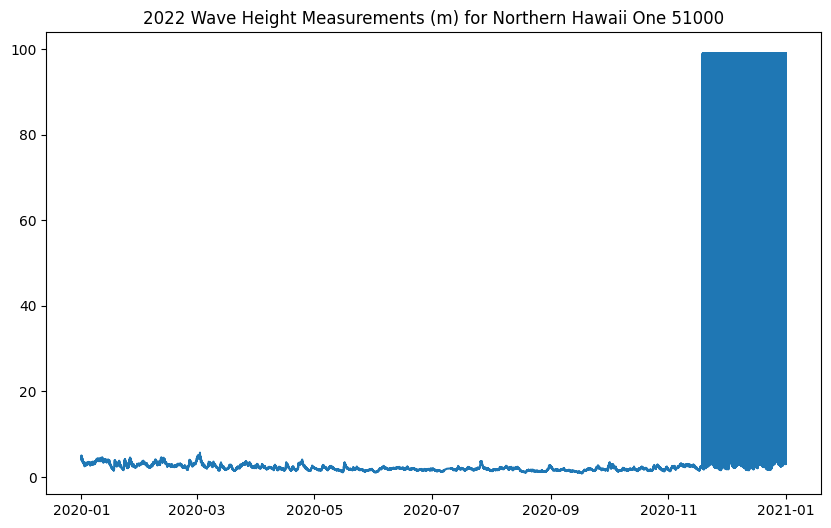

In [106]:
arima_data20['WVHT'] = arima_data20['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(10,6)) # setting up the dimentions for our plot
plt.title('2022 Wave Height Measurements (m) for Northern Hawaii One 51000') # setting up a title
plt.plot(arima_data20['WVHT']) # plotting our data

In [115]:
arima_data19 = arima_data19.set_index('Date') # setting date column to index
arima_data19.head() # looking at first five rows of arima_data

,WVHT
Date,
2019-01-01 00:50:00,2.54
2019-01-01 01:50:00,2.61
2019-01-01 02:50:00,2.78
2019-01-01 03:50:00,2.58
2019-01-01 04:50:00,2.65


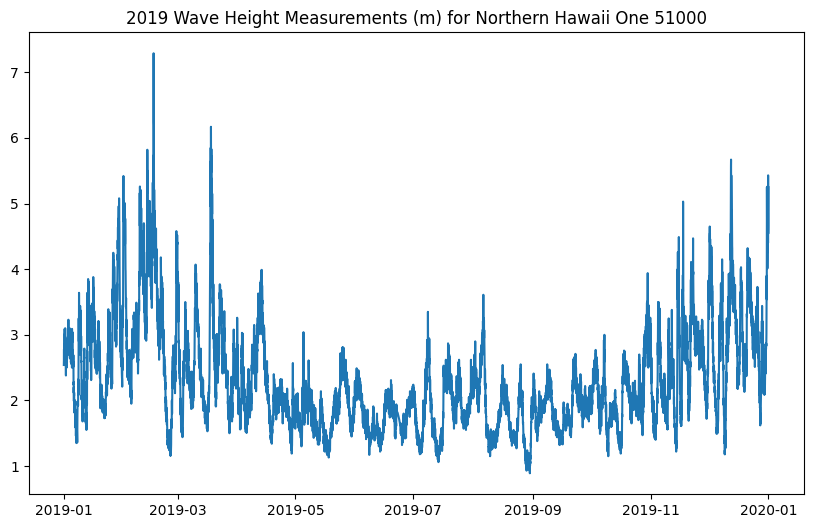

In [101]:
arima_data19['WVHT'] = arima_data19['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(10,6)) # setting up the dimentions for our plot
plt.title('2019 Wave Height Measurements (m) for Northern Hawaii One 51000') # setting up a title
plt.plot(arima_data19['WVHT']) # plotting our data

In [69]:
arima_tts = arima_data['WVHT']
arima_train = arima_tts[:int(len(arima_data)*0.8)] # selecting 80% of arima_data for training
arima_test = arima_tts[int(len(arima_data)*0.8):] # selecting the last 20% of data for testing

In [70]:
print(len(arima_train)) # printing the length of arima_train
print(len(arima_test)) # printing the length of arima_test
print(len(arima_data)) # arima_train + arima_test should equal arima_data

6960
1740
8700


In [71]:
adf_test = adfuller(arima_data['WVHT']) # performing adf test
print('ADF Statistic: ', adf_test[0]) # printing results
print('P-value: ', adf_test[1])

ADF Statistic:  -7.931554393767213
P-value:  3.5020748670068255e-12


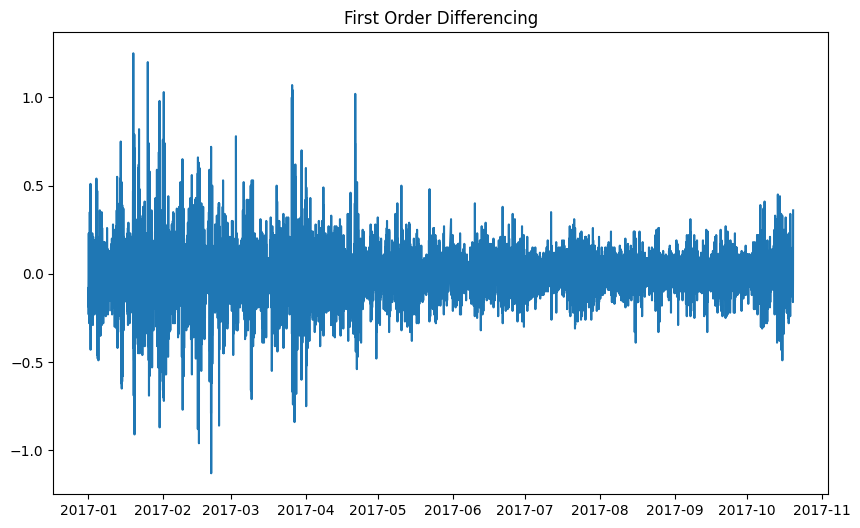

In [72]:
arima_train_diff = arima_train.diff().dropna() # first order differencing

plt.figure(figsize=(10, 6)) # setting up plot size
plt.title('First Order Differencing')
plt.plot(arima_train_diff) # plotting differencing results

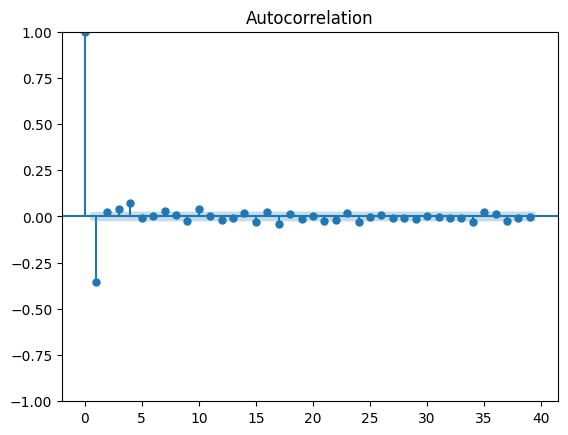

In [120]:
acf_plot = plot_acf(arima_train.diff().dropna()) # autocorrelation plot using training data

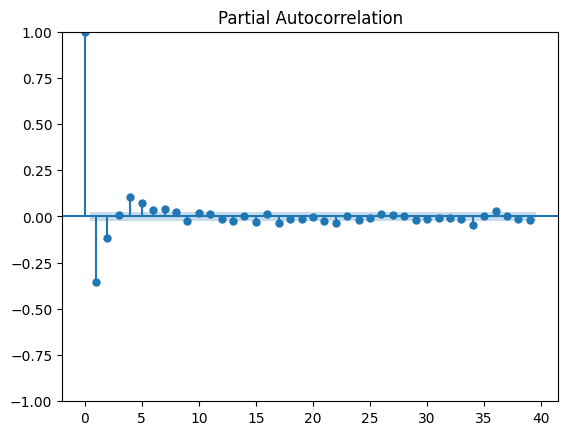

In [121]:
pacf_plot = plot_pacf(arima_train.diff().dropna()) # partial autocorrelation plot on training data

In [122]:
import pmdarima as pm # importing the package

auto_arima = pm.auto_arima(arima_train, stepwise = False, seasonal = False) # using auto arima on the training data

auto_arima # printing variable

ARIMA(order=(4, 1, 1), scoring_args={}, suppress_warnings=True)

In [ ]:
waveheight_values = arima_data.WVHT
history = [x for x in arima_train]
predictions = list()
for t in range(len(arima_test)):
  model = ARIMA(history, order=(4,1,1)) # input the paramaters here within order=()
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = arima_test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))
  #Are we adding more to this with new data? or does this stay the same

predicted=2.890203, expected=3.020000
predicted=2.971314, expected=3.230000
predicted=3.156163, expected=3.320000
predicted=3.306411, expected=3.170000
predicted=3.261535, expected=3.200000
predicted=3.256190, expected=3.550000
predicted=3.437315, expected=3.320000
predicted=3.380597, expected=3.380000
predicted=3.406553, expected=3.190000
predicted=3.301347, expected=3.390000
predicted=3.333200, expected=2.880000
predicted=3.064578, expected=3.140000
predicted=3.080080, expected=3.140000
predicted=3.099239, expected=3.140000
predicted=3.091969, expected=2.800000
predicted=2.937624, expected=3.060000
predicted=2.990995, expected=2.910000
predicted=2.924195, expected=3.000000
predicted=2.945794, expected=2.900000
predicted=2.930393, expected=2.860000
predicted=2.875776, expected=3.020000
predicted=2.956376, expected=2.820000
predicted=2.869509, expected=2.870000
predicted=2.867152, expected=2.730000
predicted=2.785749, expected=2.700000
predicted=2.711492, expected=2.820000
predicted=2.

In [43]:
model_fit.save("file")

NameError: name 'model_fit' is not defined

In [44]:
from statsmodels.tsa.arima.model import ARIMAResults

results = ARIMAResults.load("file")

FileNotFoundError: [Errno 2] No such file or directory: 'file'

In [ ]:
#import csv
#with open('predictions.csv', 'w', newline='') as file:
    # Step 4: Using csv.writer to write the list to the CSV file
    #writer = csv.writer(file)
    #writer.writerow(predictions) # Use writerow for single list
    # Click file, then open, you will see the "predictions.csv"

In [ ]:
#file = open('predictions.csv', 'r')
#data = list(csv.reader(file,delimiter=","))
#file.close()

In [ ]:
# save model
#model_fit.save('model.pkl')
# load model
#loaded = ARIMAResults.load('model.pkl')

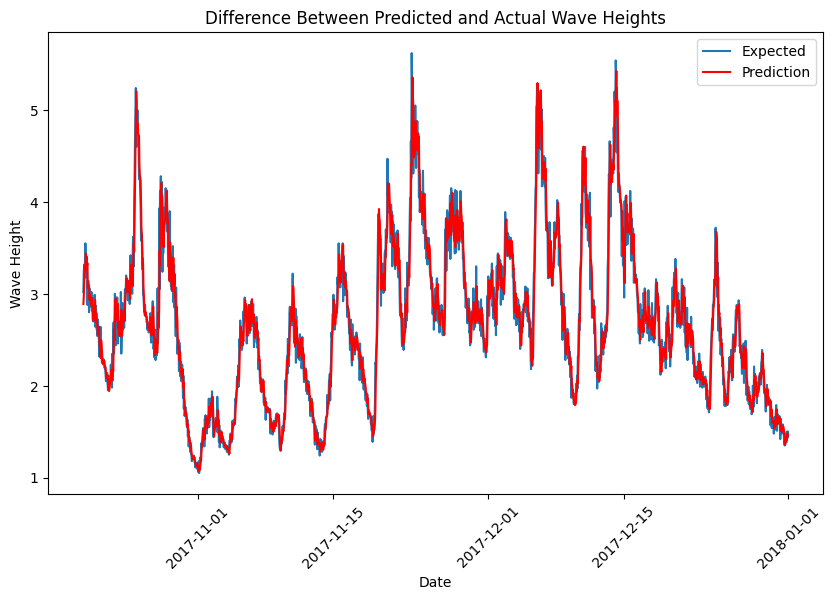

In [ ]:
test_x = arima_test.index # creating an index variable so that it's the dates

plt.figure (figsize=(10,6)) # setting up the plot size

plt.plot(test_x, arima_test, label='Expected') # plotting expected values
plt.plot(test_x, predictions, color='red', label='Prediction') # plotting predicted values
plt.xlabel('Date')
plt.ylabel('Wave Height')
plt.title('Difference Between Predicted and Actual Wave Heights')
plt.legend() # adding a legend to the plot

plt.xticks(rotation=45) # rotating the x labels for better visualization

plt.show()

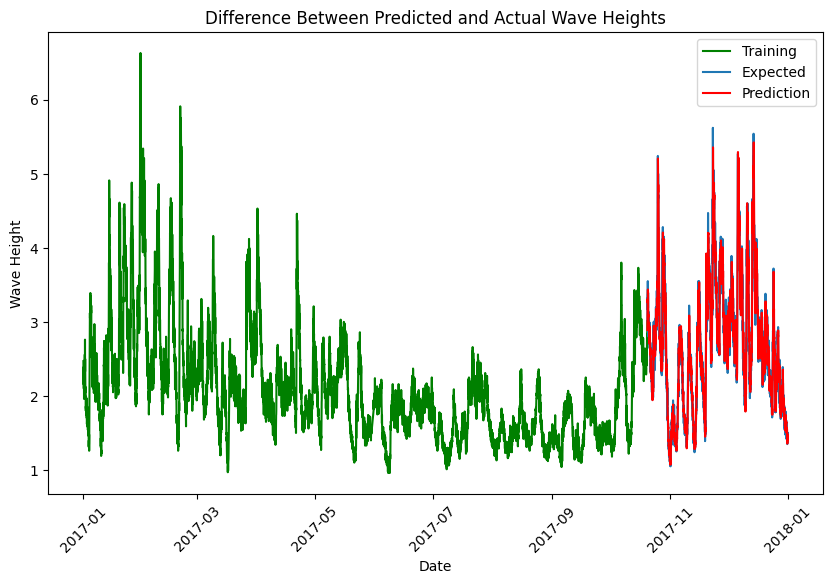

In [ ]:
train_x = arima_train.index # creating an index variable for training
test_x = arima_test.index # creating an index variable for testing
plt.figure (figsize=(10,6)) # setting up the plot size
plt.plot(train_x, arima_train, color = 'green', label = 'Training') # plotting training values
plt.plot(test_x, arima_test, label='Expected') # plotting expected values
plt.plot(test_x, predictions, color='red', label='Prediction') # plotting predicted values
plt.xlabel('Date')
plt.ylabel('Wave Height')
plt.title('Difference Between Predicted and Actual Wave Heights')
plt.legend() # adding a legend to the plot
plt.xticks(rotation=45) # rotating the x labels for better visualization
plt.show()

In [ ]:
mae = mean_absolute_error(arima_test, predictions) # calculating mean absolute error
r_sq = r2_score(arima_test, predictions) # calculating root squared value
print('Test MAE: ', mae)
print('Test R^2: ', r_sq)

Test MAE:  0.14916841752601512
Test R^2:  0.9408758487071269


In [ ]:
# Plotting the results
forecast_dates=forecast_dates
plt.figure(figsize=(10,6))  # Setting up the plot size
# Plotting the entire wave height series
plt.plot(waveheight_values.index, waveheight_values, label='Observed')
# Plotting the forecasted values
plt.plot(forecast_dates, forecast, color='red', label='Forecasted')
# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Wave Height')
plt.title('Wave Height Forecast')
plt.legend()  # Adding a legend to the plot
# Rotating x-axis labels for better visualization
plt.xticks(rotation=45)
# Displaying the plot
plt.show() #

NameError: name 'forecast_dates' is not defined

In [ ]:
# Forecast the next 200 values (or however many you want)
forecast_steps = 200
forecast = model.predict(n_periods=forecast_steps, return_conf_int=True)

# Creating future date index for the forecast
forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, closed='right')
forecast_series = pd.Series(forecast, index=forecast_dates)


NameError: name 'model' is not defined

Today's Notes
- Explore seasonality for new data
- Drop NA(99) VALUES combine data from 2017 to 2013

- Clone RP